# PySD usage
This notebook shows how to run a simple Vensim model with PySD and feed results to `simclstr.clusterer`.

MDL dosyasının bulunduğu yerde, path'de pycache ve py dosyaları oluşuyor, onları main kodda fonksiyonun altında silmek lazım.

import sys'den model_path'e olan 4 satır package yayımlanmadan silinerek commented linelar kullanılmalıdır.

In [1]:
#from simclstr.clusterer import perform_clustering, simulate_from_vensim

#model_path = 'path/to/your/model.mdl'

import sys
sys.path.insert(0, "/Users/emirsener/Desktop/ts-clustering")

from simclstr.clusterer import perform_clustering, simulate_from_vensim
from simclstr.plotting import plot_clusters

import os
model_path = os.path.expanduser('~/Desktop/temperature model/temperature model.mdl')

parameter_set = {'Initial actual temperature': [15, 20, 25],
                 'Initial measured temperature': [15, 20, 25],
                 'Desired temperature': [15, 20, 25],
                 'Adjustment time': [3*i for i in range(1, 6)],
                 'Measurement delay': [3*i for i in range(1, 6)]
                }

output_of_interest = 'Actual Temperature'

simulation_results = simulate_from_vensim(model_path, parameter_set, output_of_interest)

for i, res in enumerate(simulation_results[:5]):
    print(f"Simulation Run {i+1}:")
    print(res)
    print("-" * 40)

Simulation Run 1:
('Initial actual temperature=15, Initial measured temperature=15, Desired temperature=15, Adjustment time=3, Measurement delay=3', array([15., 15., 15., ..., 15., 15., 15.], shape=(3201,)))
----------------------------------------
Simulation Run 2:
('Initial actual temperature=15, Initial measured temperature=15, Desired temperature=15, Adjustment time=3, Measurement delay=6', array([15., 15., 15., ..., 15., 15., 15.], shape=(3201,)))
----------------------------------------
Simulation Run 3:
('Initial actual temperature=15, Initial measured temperature=15, Desired temperature=15, Adjustment time=3, Measurement delay=9', array([15., 15., 15., ..., 15., 15., 15.], shape=(3201,)))
----------------------------------------
Simulation Run 4:
('Initial actual temperature=15, Initial measured temperature=15, Desired temperature=15, Adjustment time=3, Measurement delay=12', array([15., 15., 15., ..., 15., 15., 15.], shape=(3201,)))
----------------------------------------
Sim

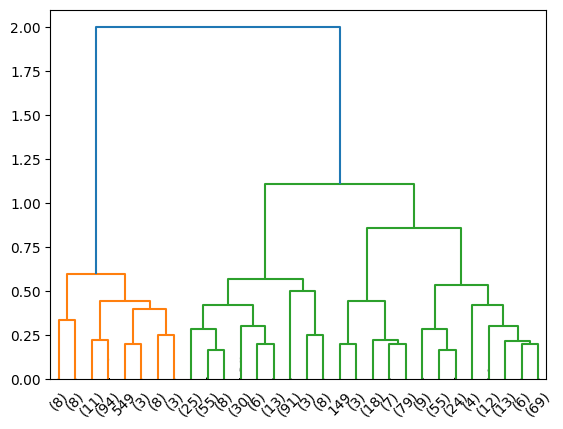

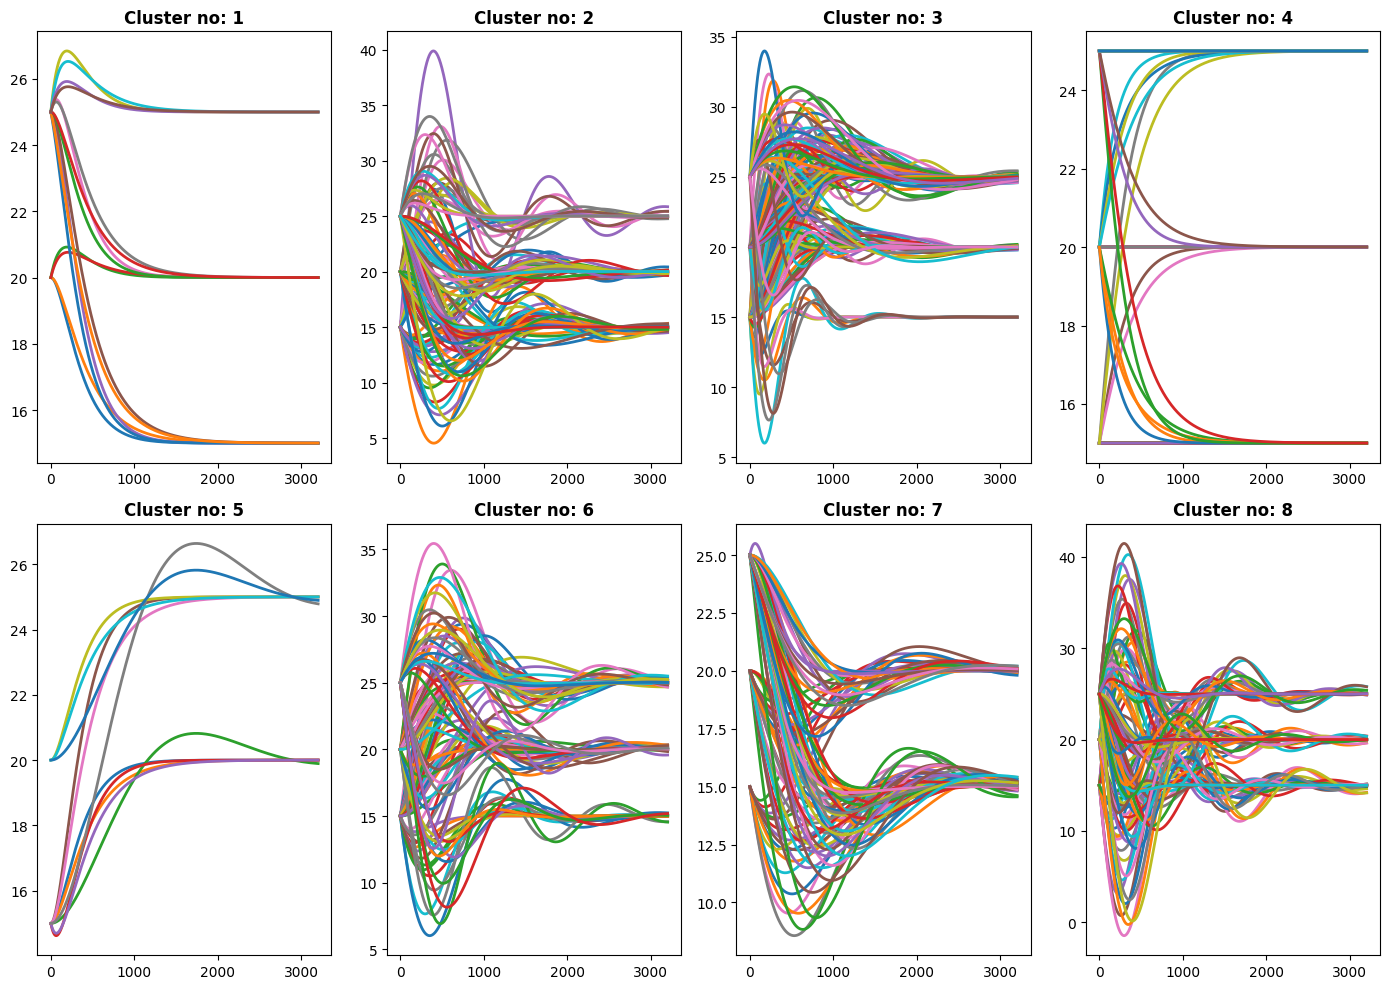

In [2]:
clustering_results = perform_clustering(simulation_results, cMethod='maxclust', cValue = 8, plotDendrogram=True)

plot_clusters(clustering_results[1], 'pattern_dtw')

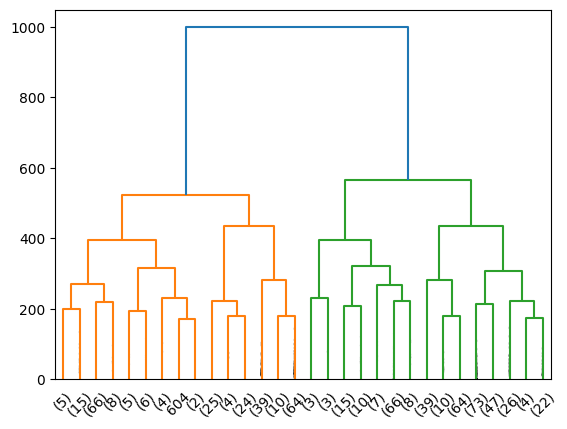

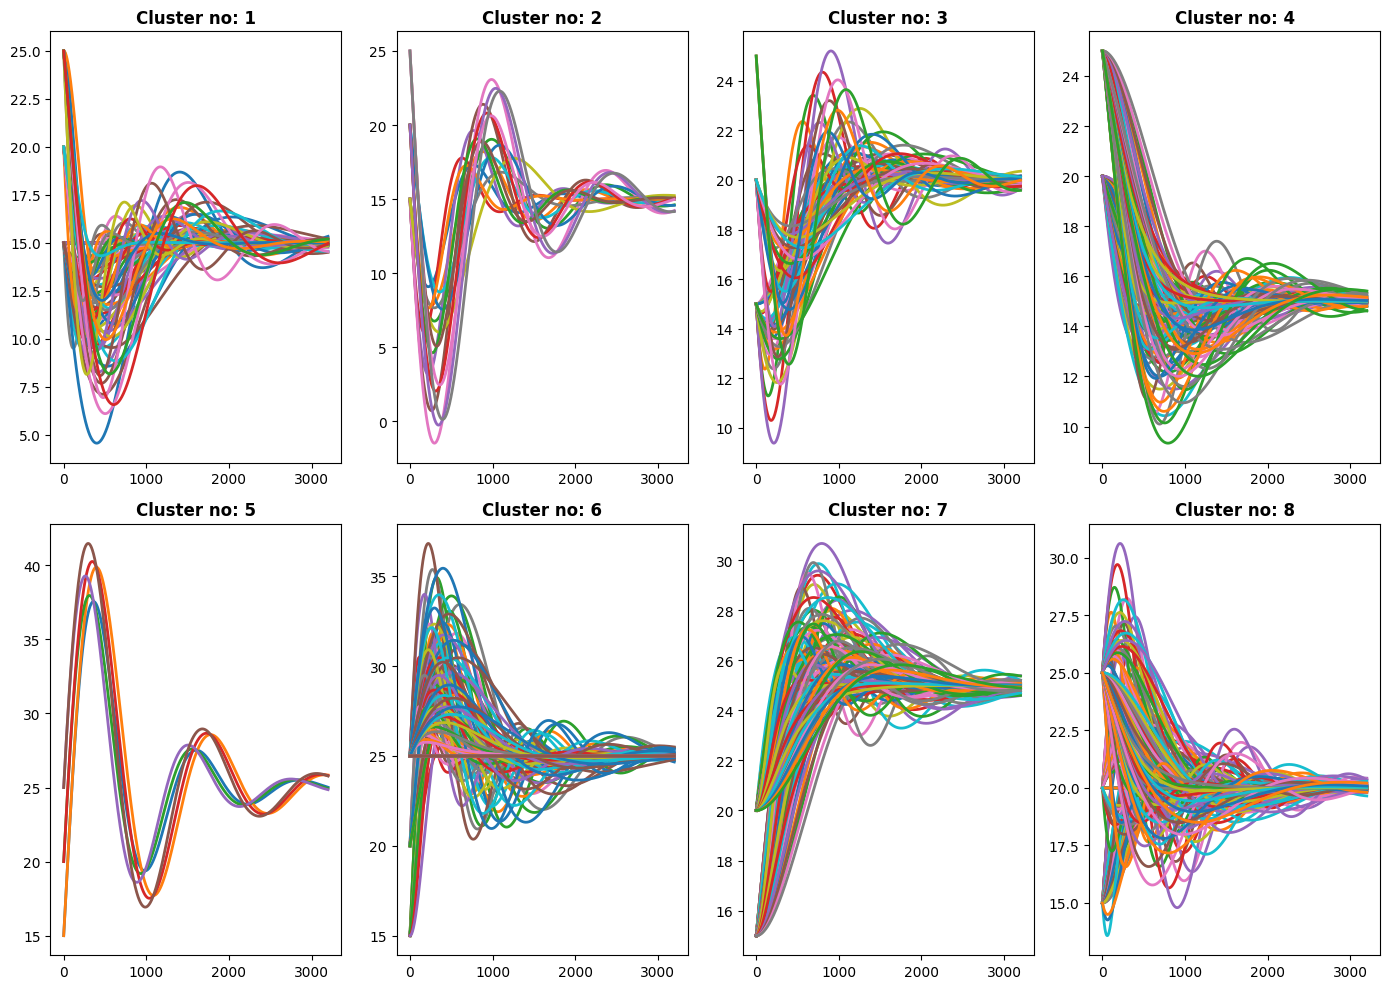

In [3]:
clustering_results = perform_clustering(simulation_results, distance='euclidean', cMethod='maxclust', cValue = 8, plotDendrogram=True, plotClusters=True)

plot_clusters(clustering_results[1], 'euclidean')